# 1. Numpy broadcasting



## Broadcasting
* Ref: https://numpy.org/doc/stable/user/basics.broadcasting.html#basics-broadcasting
* General rules
 * NumPy checks the shape of two arrays, and try to align them from the right most dimension.
 * Two dimensions are compatible when (a.) they're equal or (b.) one of them is 1.
 * Missing dimensions are assumed to have size 1.


In [ ]:
import numpy as np
# Example 1
a = np.array([[0, 0, 0],
              [10, 10, 10],
              [20, 20, 20],
              [30, 30, 30]]) # shape: (4,3)

b = np.array([1,2,3]) # shape: (3,) -> (1,3) -> (4,3)

# b is broadcasted to (4,3)
print(a+b)

[[ 1  2  3]
 [11 12 13]
 [21 22 23]
 [31 32 33]]


(figure from https://numpy.org/doc/stable/user/basics.broadcasting.html#basics-broadcasting)
![image](https://numpy.org/doc/stable/_images/broadcasting_2.png)

In [ ]:
# Example 2
a = np.array([0,10,20,30]) # shape: (4,)
a = a[:, np.newaxis] # shape: (4,1), inserts a new axis -> (4,3)

b = np.array([1,2,3]) # shape: (3,) -> (1,3) -> (4,3)

print(a+b) # c: (4,1) -> (4,3) b: (3,) -> (4,3)

[[ 1  2  3]
 [11 12 13]
 [21 22 23]
 [31 32 33]]


(figure from https://numpy.org/doc/stable/user/basics.broadcasting.html#basics-broadcasting)
![image](https://numpy.org/doc/stable/_images/broadcasting_4.png)

# 2. Pytorch

## Tensor
* Conceptually identical to a numpy array
* Have some convenient functions for machine learning / deep learning
* Keep track of a computation graph and gradients
* (*) Can be used on GPUs for faster computation


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# create a tensor from a list
l = [[1,2,3],
     [4,5,6]]

a = torch.tensor(l)
print(a)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [ ]:
# create a tensor from a numpy array
numpy_array = np.array([[2,3,4], [5,6,7]])
print(numpy_array)

b = torch.from_numpy(numpy_array)
# b = torch.tensor(numpy_array) # this works too!

print(b)
print(type(b))
print(b.dtype)

[[2 3 4]
 [5 6 7]]
tensor([[2, 3, 4],
        [5, 6, 7]])
<class 'torch.Tensor'>
torch.int64


In [ ]:
# casting to a certain data type
c = a.float()
print(c)

d = torch.tensor([True, False]).int()
print(d)

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([1, 0], dtype=torch.int32)


## Dataloader
In class we talked about stochastic gradient descent
```
for t = 1, 2, ..., T:  
  Randomly partition training examples into batches B1, …, Bk
  for i = 1, 2, ... k:
    θ = θ - η * gradient
```

How to randomly partition training examples in pytorch?

In [ ]:
# a toy dataset with 6 examples, input_dim=3
N = 6

X_train = torch.tensor(
          [[1, 2, 3],
           [2, 3, 4],
           [3, 4, 5],
           [4, 5, 6],
           [5, 6, 7],
           [6, 7, 8]]
        )

y_train = torch.tensor(
          [1,
           2,
           3,
           4,
           5,
           6]
)

train_data = [(X_train[i], y_train[i]) for i in range(N)]

In [ ]:
from torch.utils.data import DataLoader

# partition into 3 batches with batch size of 2
dataloader = DataLoader(train_data, batch_size=2, shuffle=True)

for i, batch in enumerate(dataloader):
  print("=== Batch {} ===".format(i))
  print("input: \n", batch[0])
  print("output: \n", batch[1])
  print()


=== Batch 0 ===
input: 
 tensor([[1, 2, 3],
        [2, 3, 4]])
output: 
 tensor([1, 2])

=== Batch 1 ===
input: 
 tensor([[4, 5, 6],
        [6, 7, 8]])
output: 
 tensor([4, 6])

=== Batch 2 ===
input: 
 tensor([[5, 6, 7],
        [3, 4, 5]])
output: 
 tensor([5, 3])



## Layers

In [ ]:
# Linear layer
linear_layer = nn.Linear(in_features=3, out_features=2, bias=True)
for name, parameter in linear_layer.named_parameters():
  print(name, parameter)

# the weights and biases are initialized to be some small value!

weight Parameter containing:
tensor([[-0.4317, -0.4202, -0.2938],
        [-0.0802,  0.0596,  0.3143]], requires_grad=True)
bias Parameter containing:
tensor([ 0.2828, -0.0814], requires_grad=True)


In [ ]:
# Apply the linear layer to some input
X_train = X_train.float()
print(X_train.shape) # (6,3)

output = linear_layer(X_train) # linear layer is doing Wx+b. W: (3,2), b: (2,)
print(output)
print(output.shape) # the output should be (6,2)

torch.Size([6, 3])
tensor([[-1.8707,  0.9005],
        [-3.0164,  1.1942],
        [-4.1621,  1.4879],
        [-5.3079,  1.7816],
        [-6.4536,  2.0753],
        [-7.5993,  2.3690]], grad_fn=<AddmmBackward0>)
torch.Size([6, 2])


## Non-linearity Functions
![image](https://studymachinelearning.com/wp-content/uploads/2019/10/summary_activation_fn.png)

Source: https://studymachinelearning.com/activation-functions-in-neural-network/

In [ ]:
import torch.nn.functional as F
x = torch.tensor([-10, -1, 0, 1, 10])

In [ ]:
# Sigmoid

# out = F.sigmoid(x) # deprecated :(
out = torch.sigmoid(x)

# layer = nn.Sigmoid()
# out = layer(x)

print(out)

tensor([4.5398e-05, 2.6894e-01, 5.0000e-01, 7.3106e-01, 9.9995e-01])


In [ ]:
# ReLU

out = F.relu(x)
# out = torch.relu(x) # equivalent to F.relu

print(out)

tensor([ 0,  0,  0,  1, 10])


In [ ]:
# Tanh

# out = F.tanh(x) # deprecated :(
out = torch.tanh(x)

print(out)

tensor([-1.0000, -0.7616,  0.0000,  0.7616,  1.0000])


## Loss Function

In [ ]:
# MSE (Regression)

# 4 examples in the current batch
y_pred = torch.tensor([1.0, 2.0, 3.0, 4.0])
y_true = torch.tensor([1.0, 2.0, 5.0, 4.0])
#                                ^ here we have a loss of (5.0-3.0)^2 = 4.0

loss_func = nn.MSELoss()
loss = loss_func(y_pred, y_true)
print(loss) # per-example loss (4.0 / 4)

tensor(1.)


In [ ]:
#Cross entropy (Classification)

loss = nn.CrossEntropyLoss()
#3 examples - 5 classes
pred = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5).softmax(dim=1)
print(pred)
print(target)
output = loss(pred, target)
print(output)
# output.backward()

tensor([[ 0.7075, -0.3931,  0.0478, -1.5920, -1.3622],
        [-0.7938,  1.3930, -1.0436, -0.3597,  0.9627],
        [ 2.1430, -0.7284,  0.5732,  0.0979,  2.6749]], requires_grad=True)
tensor([[0.1917, 0.2698, 0.1693, 0.0962, 0.2730],
        [0.0315, 0.2030, 0.3587, 0.0810, 0.3259],
        [0.0842, 0.0554, 0.4093, 0.3389, 0.1123]])
tensor(2.1401, grad_fn=<DivBackward1>)


## Optimizer

In [ ]:
import torch
from torch.optim import SGD

parameter = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

# in this toy example
# our goal is to minimize the sum of all individual parameters
loss = parameter.sum()
loss.backward()
print(parameter.grad)

optimizer = SGD([parameter], lr=0.1)
optimizer.step()
print(parameter)

## Explanation:
# 1 - 0.1 * 1 = 0.9
# 2 - 0.1 * 1 = 1.9
# 3 - 0.1 * 1 = 2.9

tensor([1., 1., 1.])
tensor([0.9000, 1.9000, 2.9000], requires_grad=True)


In [ ]:
print(parameter.grad)
optimizer.zero_grad()
print(parameter.grad)

tensor([1., 1., 1.])
None


# Linear Regression

## Example 1

(100,)
(100,)
[9.12377053 7.37512178 9.95763978]
[51.04782522 37.7742591  48.81586657]


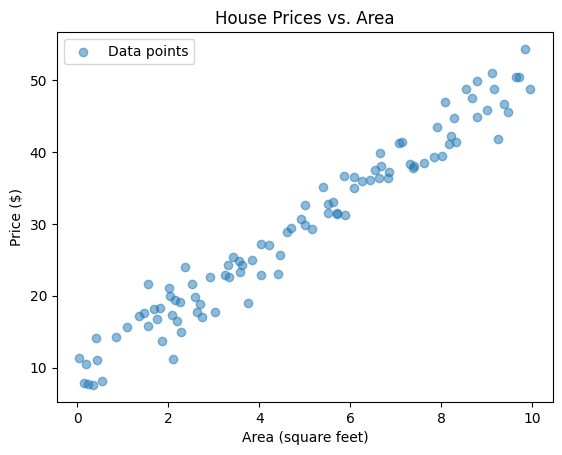

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#create some fake data for the example
#we assume that price = a*area + b i.e there is a linear relationship connecting area with price
#y = ax + b

a = 4
b = 10

num_samples = 100

x = np.random.uniform(0, 10, num_samples)
noise = np.random.normal(0, 2.5, num_samples) #add some noise because in reality the prices are not exactly a * x_1 + b. There are for sure two houses with the same area that were sold in slightly different prices (either because the seller was better in one case or because there were other factors such as the location of the house that affect the price)

y = a * x + b
y = y + noise

print(x.shape)
print(y.shape)


print(x[:3])
print(y[:3])


def visualize_learned_function(X_train, y_train, model=None):
  x_values = torch.linspace(0, 10, 100).view(-1, 1)


  # Predict y values (prices) using the trained model
  if model is not None:
    y_values = model(x_values).detach().numpy()

  # Plot the original data points
  plt.scatter(X_train, y_train, alpha=0.5, label='Data points')

  # Plot the learned linear function
  if model is not None:
    plt.plot(x_values.numpy(), y_values, color='red', label='Learned function')

  # Add labels and title
  plt.xlabel('Area (square feet)')
  plt.ylabel('Price ($)')
  plt.title('House Prices vs. Area')
  plt.legend()
  plt.show()

visualize_learned_function(x, y)



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LinearRegression(nn.Module):
#We always need to define init and forward when working with pytorch.


  def __init__(self, input_dim, output_dim): #input_dim = num_of_features = 1 (area - x_1) ---- output_dim = 1 (price - y)
    super(LinearRegression, self).__init__()

    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, X):
    y = self.linear(X)
    return y




In [ ]:
def train(model, X_train, y_train, batch_size=256, lr=1e-1, epochs=100):

  model.train()
  loss_fn = nn.MSELoss()

  optimizer = torch.optim.SGD(model.parameters(), lr=lr)

  for epoch in range(epochs):
    optimizer.zero_grad()

    y_pred = model(X_train)

    loss = loss_fn(y_pred, y_train)

    loss.backward()
    optimizer.step() #gradient descent update

    # for param in model.named_parameters():
    #   print(param)

    print(f'Epoch: {epoch} - Loss: {loss}')






Single feature
https://drive.google.com/file/d/1UCkZ--0dwSbWM6FxBfN_nHAWtWDTTJ-B/view?usp=drive_link


Parameter containing:
tensor([[0.6339]], requires_grad=True)
Parameter containing:
tensor([0.9703], requires_grad=True)
Epoch: 0 - Loss: 754.688232421875
Epoch: 1 - Loss: 108.91724395751953
Epoch: 2 - Loss: 30.776229858398438
Epoch: 3 - Loss: 21.212390899658203
Epoch: 4 - Loss: 19.934659957885742
Epoch: 5 - Loss: 19.659215927124023
Epoch: 6 - Loss: 19.50606918334961
Epoch: 7 - Loss: 19.368906021118164
Epoch: 8 - Loss: 19.234865188598633
Epoch: 9 - Loss: 19.102384567260742
Epoch: 10 - Loss: 18.97125816345215
Epoch: 11 - Loss: 18.841445922851562
Epoch: 12 - Loss: 18.71295166015625
Epoch: 13 - Loss: 18.585742950439453
Epoch: 14 - Loss: 18.459810256958008
Epoch: 15 - Loss: 18.335145950317383
Epoch: 16 - Loss: 18.21173667907715
Epoch: 17 - Loss: 18.08955955505371
Epoch: 18 - Loss: 17.968610763549805
Epoch: 19 - Loss: 17.84888458251953
Epoch: 20 - Loss: 17.730358123779297
Epoch: 21 - Loss: 17.613025665283203
Epoch: 22 - Loss: 17.496868133544922
Epoch: 23 - Loss: 17.38187599182129
Epoch: 24 -

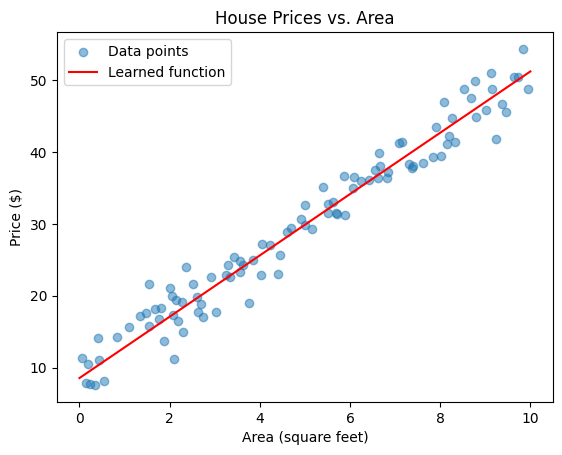

In [ ]:
X_train = torch.tensor(x).float() #from float64 (double) to float32 to be compatible with the weight's dtype
X_train = X_train.unsqueeze(1) #add an extra dimension
y_train = torch.tensor(y).float()
y_train = y_train.unsqueeze(1) #add an extra dimension



model = LinearRegression(1, 1)

#w and b before training (randomly initialised). After training we hope to have w = 4 and b = 10 because that's the real w and b and that's what we are trying to learn: the underlying function that connects the features with the target
for param in model.parameters():
  print(param)


train(model, X_train, y_train, lr=1e-2, epochs=500)


for param in model.parameters():
  print(param)

visualize_learned_function(X_train, y_train, model)

## Example 2

Now let's add an extra feature to see how this works with more than 1 features

In [ ]:
# Number of data points
n_samples = 100

# Generate random feature values
np.random.seed(0)
x_1 = np.random.uniform(0, 10, n_samples) #area
x_2 = np.random.uniform(1, 20, n_samples) #age

# Define the parameters for the linear relationship
w1 = 4  # Coefficient for feature1
w2 = 2  # Coefficient for feature2
b = 10  # Base price

# Calculate the prices based on the linear relationship
y = w1 * x_1 + w2 * x_2 + b

# Add some noise to the prices
noise = np.random.normal(0, 2.5, n_samples)
prices_with_noise = y + noise

# Create tensors for features and prices
X_train = torch.tensor(np.column_stack((x_1, x_2)), dtype=torch.float32)
y = torch.tensor(prices_with_noise, dtype=torch.float32)
y_train = y.unsqueeze(1)

print(X_train.shape)
print(y_train.shape)

torch.Size([100, 2])
torch.Size([100, 1])


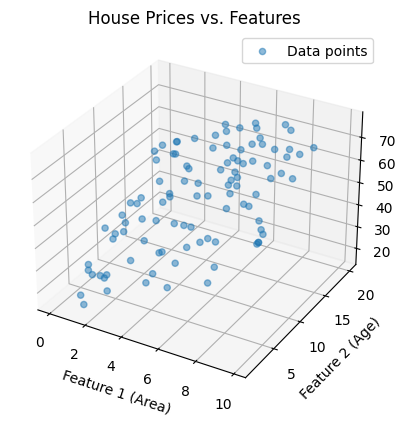

In [ ]:
#Visualize data
def visualize_3d_data(x_1, x_2, y_train, model=None):
  # Generate a grid of values for feature1 and feature2
  feature1_range = np.linspace(0, 10, 50)
  feature2_range = np.linspace(1, 20, 50)
  feature1_grid, feature2_grid = np.meshgrid(feature1_range, feature2_range)

  # Flatten the grids and stack them to pass through the model
  features_grid = np.column_stack((feature1_grid.ravel(), feature2_grid.ravel()))
  features_grid_tensor = torch.tensor(features_grid, dtype=torch.float32)

  # Predict prices using the trained model
  if model is not None:
    predicted_prices_grid = model(features_grid_tensor).detach().numpy().reshape(feature1_grid.shape)

  # Plot the original data points
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x_1, x_2, y_train, alpha=0.5, label='Data points')

  # Plot the learned regression plane
  if model is not None:
    ax.plot_surface(feature1_grid, feature2_grid, predicted_prices_grid, color='red', alpha=0.5)

  # Add labels and title
  ax.set_xlabel('Feature 1 (Area)')
  ax.set_ylabel('Feature 2 (Age)')
  ax.set_zlabel('Price')
  ax.set_title('House Prices vs. Features')
  ax.legend()

visualize_3d_data(x_1, x_2, y_train)

Two features:

https://drive.google.com/file/d/1mnV1xl8yS0TYfc7FetAemv8Ui58Vrv9z/view?usp=drive_link

torch.Size([100, 2])
Epoch: 0 - Loss: 1887.3426513671875
Epoch: 1 - Loss: 903.5370483398438
Epoch: 2 - Loss: 469.8731689453125
Epoch: 3 - Loss: 277.09796142578125
Epoch: 4 - Loss: 189.87515258789062
Epoch: 5 - Loss: 148.9745330810547
Epoch: 6 - Loss: 128.47073364257812
Epoch: 7 - Loss: 117.01289367675781
Epoch: 8 - Loss: 109.62825012207031
Epoch: 9 - Loss: 104.13549041748047
Epoch: 10 - Loss: 99.57495880126953
Epoch: 11 - Loss: 95.52186584472656
Epoch: 12 - Loss: 91.78578186035156
Epoch: 13 - Loss: 88.2789077758789
Epoch: 14 - Loss: 84.95873260498047
Epoch: 15 - Loss: 81.8026123046875
Epoch: 16 - Loss: 78.79679870605469
Epoch: 17 - Loss: 75.93175506591797
Epoch: 18 - Loss: 73.19971466064453
Epoch: 19 - Loss: 70.5940933227539
Epoch: 20 - Loss: 68.10877227783203
Epoch: 21 - Loss: 65.73811340332031
Epoch: 22 - Loss: 63.47675704956055
Epoch: 23 - Loss: 61.31965255737305
Epoch: 24 - Loss: 59.261993408203125
Epoch: 25 - Loss: 57.29914855957031
Epoch: 26 - Loss: 55.4267578125
Epoch: 27 - Loss

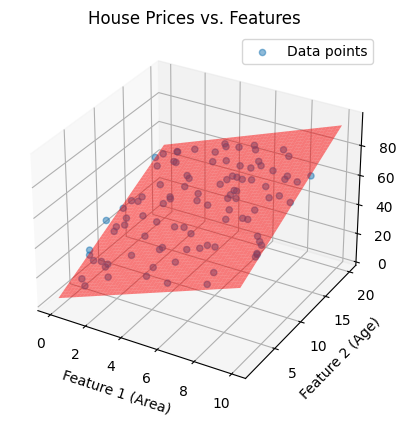

In [ ]:
model = LinearRegression(2, 1) #input_dim = 2 this time because we have 2 input features

print(X_train.shape)

train(model, X_train, y_train, lr=1e-3, epochs=500)

for param in model.named_parameters():
  print(param)

visualize_3d_data(x_1, x_2, y_train, model)

## Example 3

Where does linear regression fail?

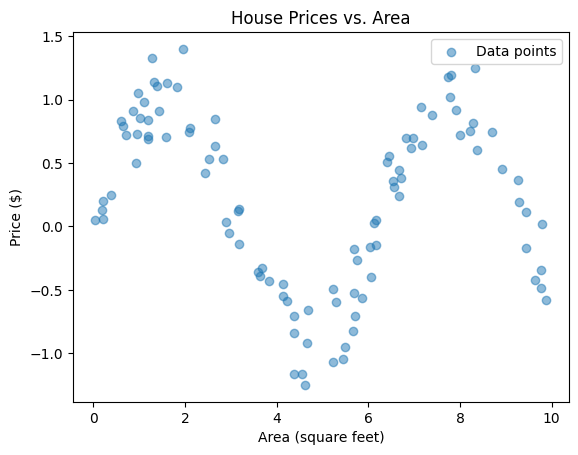

In [ ]:
n_samples = 100

# Generate random x values
np.random.seed(0)
x = np.random.uniform(0, 10, n_samples)

# Define the parameters for the sine function
# a = 1
# b = 1

# Calculate the y values based on the sine function
# y = a * np.sin(b * x)

y = np.sin(x)

# Add some noise to the y values
noise = np.random.normal(0, 0.2, n_samples)
y_with_noise = y + noise

# Create tensors for x and y
X_train = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_train = torch.tensor(y_with_noise, dtype=torch.float32).view(-1, 1)

visualize_learned_function(X_train, y_train)

Epoch: 0 - Loss: 19.10834312438965
Epoch: 1 - Loss: 16.85504913330078
Epoch: 2 - Loss: 14.875864028930664
Epoch: 3 - Loss: 13.137442588806152
Epoch: 4 - Loss: 11.610496520996094
Epoch: 5 - Loss: 10.269296646118164
Epoch: 6 - Loss: 9.091243743896484
Epoch: 7 - Loss: 8.056490898132324
Epoch: 8 - Loss: 7.147604942321777
Epoch: 9 - Loss: 6.349273681640625
Epoch: 10 - Loss: 5.648046493530273
Epoch: 11 - Loss: 5.032108306884766
Epoch: 12 - Loss: 4.491084575653076
Epoch: 13 - Loss: 4.015861511230469
Epoch: 14 - Loss: 3.5984346866607666
Epoch: 15 - Loss: 3.231771230697632
Epoch: 16 - Loss: 2.909695625305176
Epoch: 17 - Loss: 2.626784086227417
Epoch: 18 - Loss: 2.3782715797424316
Epoch: 19 - Loss: 2.159973382949829
Epoch: 20 - Loss: 1.9682137966156006
Epoch: 21 - Loss: 1.7997643947601318
Epoch: 22 - Loss: 1.6517890691757202
Epoch: 23 - Loss: 1.521796703338623
Epoch: 24 - Loss: 1.407599687576294
Epoch: 25 - Loss: 1.307276964187622
Epoch: 26 - Loss: 1.219139814376831
Epoch: 27 - Loss: 1.141706347

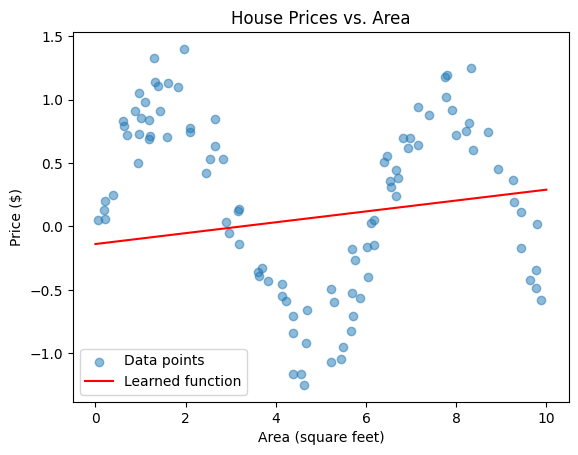

In [ ]:
model = LinearRegression(1, 1) #input_dim = 2 this time because we have 2 input features


train(model, X_train, y_train, lr=1e-3, epochs=500)

visualize_learned_function(X_train, y_train, model)

# Neural Networks

As we saw linear regression fails in non linear tasks. This is not 100% true. You can actually do some feature engineering and add some non-linear features and achiene non-linearity. Linear regression is "linear" because the output is a linear combination of the input features. But the input features can be non-linear for example $x_1 = Area, x_2 = Area^2$ etc. This way the output is actually non linear. But in general, instead of going through this process we prefer to use neural nets which are by their nature non linear.
Neural networks can work in both linear and non-linear tasks and that's why they are so powerful. In fact, neural nets are universal approximators, meaning that given enough hidden units they can approximate any continuous function.

Inside one neuron:

https://drive.google.com/file/d/1WBIQCPxwL3oPmZny9sGmAtfyVXKw_5id/view?usp=drive_link

One neural net:

https://drive.google.com/file/d/1VHuAfLM5-I97qJ0mTbPmRJctgdj6RVTz/view?usp=drive_link

Streaming output truncated to the last 5000 lines.
Epoch: 5000 - Loss: 0.20822754502296448
Epoch: 5001 - Loss: 0.20820462703704834
Epoch: 5002 - Loss: 0.208220973610878
Epoch: 5003 - Loss: 0.2081994265317917
Epoch: 5004 - Loss: 0.2082192450761795
Epoch: 5005 - Loss: 0.208196222782135
Epoch: 5006 - Loss: 0.20820552110671997
Epoch: 5007 - Loss: 0.20818349719047546
Epoch: 5008 - Loss: 0.208203986287117
Epoch: 5009 - Loss: 0.20818276703357697
Epoch: 5010 - Loss: 0.2081926017999649
Epoch: 5011 - Loss: 0.20817039906978607
Epoch: 5012 - Loss: 0.208191379904747
Epoch: 5013 - Loss: 0.20817002654075623
Epoch: 5014 - Loss: 0.20818069577217102
Epoch: 5015 - Loss: 0.20816020667552948
Epoch: 5016 - Loss: 0.20818176865577698
Epoch: 5017 - Loss: 0.20815983414649963
Epoch: 5018 - Loss: 0.20817101001739502
Epoch: 5019 - Loss: 0.2081514596939087
Epoch: 5020 - Loss: 0.2081737071275711
Epoch: 5021 - Loss: 0.208152636885643
Epoch: 5022 - Loss: 0.20817191898822784
Epoch: 5023 - Loss: 0.2081507444381714
Epoch

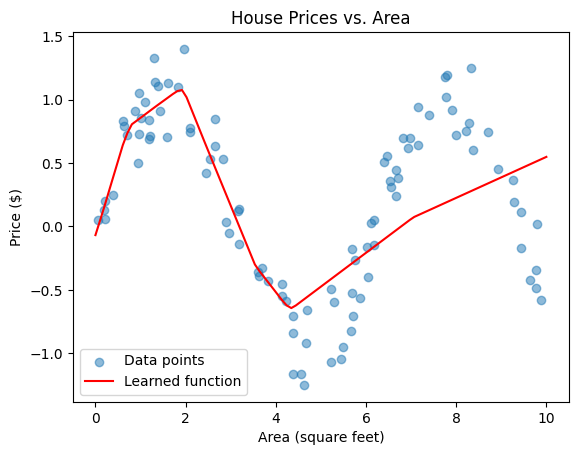

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNet, self).__init__()

        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, hidden_dim)
        self.linear3 = nn.Linear(hidden_dim, output_dim)



    def forward(self, x):

        z1 = self.linear1(x)
        a1 = F.relu(z1)
        z2 = self.linear2(a1)
        a2 = F.relu(z2)
        y = self.linear3(a2)
        return y


model = NeuralNet(1,32,1)
print(X_train.shape)

train(model, X_train, y_train, lr=1e-2, epochs=20000)

visualize_learned_function(X_train, y_train, model)


In reality in addition to the training set we also have a validation/development set and a test set.

Validation set: Used for hyper-parameter tunning
Test set: Used to asses our final model

We won't use a validation set here but in real world applications you need 3 splits: train, dev, test.

What I want to show now is how we use the DataLoader to work with batches (from Gradient Descent to Stochastic/Mini-batch gradient descent)

In [ ]:
def train(model, X_train, y_train, lr=1e-1, batch_size=32, epochs=30):

    loss_fn = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    # Prepare the training dataset
    # Pytorch DataLoader expects a dataset to be a list of (x, y) pairs
    train_dataset = [(X_train[i, :], y_train[i]) for i in range(len(y_train))]

    for t in range(epochs):
        train_num_correct = 0

        # Training loop
        model.train()  # Set model to "training mode", e.g. turns dropout on if you have dropout layers
        for batch in DataLoader(train_dataset, batch_size=batch_size, shuffle=True):
            # DataLoader automatically groups the data into batchse of roughly batch_size
            # shuffle=True makes it so that the batches are randomly chosen in each epoch
            # unpack batch, which is a tuple (x_batch, y_batch)
            x_batch, y_batch = batch
            # x_batch is tensor of size (B, D) where D is the number of input features
            # y_batch is tensor of size (B,)
            optimizer.zero_grad()  # Reset the gradients to zero
            y_pred = model(x_batch)

            # Compute the loss of the model output compared to true values
            loss = loss_func(y_pred, y_batch)
            loss.backward()  # Run backpropagation to compute gradients
            optimizer.step()  # Take a SGD step
            # Note that when we created the optimizer, we passed in model.parameters()
            # This is a list of all parameters of all layers of the model
            # optimizer.step() iterates over this list and does an SGD update to each parameter

        print(
            f'Epoch {t: <2}: loss={loss:.5f}')


#For evaluation we use the test set so X and y here should belong to the test set.
def evaluate(model, X, y):

    model.eval()  # Set model to "eval mode", e.g. turns dropout off if you have dropout layers.
    loss_fn = nn.MSELoss()
    with torch.no_grad():  # Don't allocate memory for storing gradients, more efficient when not training
        y_pred = model(X)  # tensor of size (N, 10)
        # Choose argmax for each row (i.e., collapse dimension 1, hence dim=1)
        loss = loss_fn(y_pred, y)
    print(f'loss: {loss:.5f}')




Streaming output truncated to the last 5000 lines.
Epoch 0 : loss=0.36090
Epoch 1 : loss=0.66553
Epoch 2 : loss=0.21403
Epoch 3 : loss=0.34465
Epoch 4 : loss=0.67129
Epoch 5 : loss=0.80327
Epoch 6 : loss=0.41106
Epoch 7 : loss=0.85813
Epoch 8 : loss=0.60240
Epoch 9 : loss=0.57073
Epoch 10: loss=0.38875
Epoch 11: loss=0.49618
Epoch 12: loss=0.54084
Epoch 13: loss=0.57592
Epoch 14: loss=0.33703
Epoch 15: loss=0.87873
Epoch 16: loss=0.24573
Epoch 17: loss=0.96312
Epoch 18: loss=0.35991
Epoch 19: loss=0.64057
Epoch 20: loss=0.40076
Epoch 21: loss=0.09131
Epoch 22: loss=0.18364
Epoch 23: loss=0.04825
Epoch 24: loss=1.02350
Epoch 25: loss=0.62163
Epoch 26: loss=0.16427
Epoch 27: loss=0.56841
Epoch 28: loss=0.62556
Epoch 29: loss=0.57953
Epoch 30: loss=0.29144
Epoch 31: loss=0.51199
Epoch 32: loss=0.63535
Epoch 33: loss=1.01395
Epoch 34: loss=0.44436
Epoch 35: loss=0.87316
Epoch 36: loss=0.77918
Epoch 37: loss=0.22545
Epoch 38: loss=0.52845
Epoch 39: loss=0.28983
Epoch 40: loss=0.52218
Epoch 

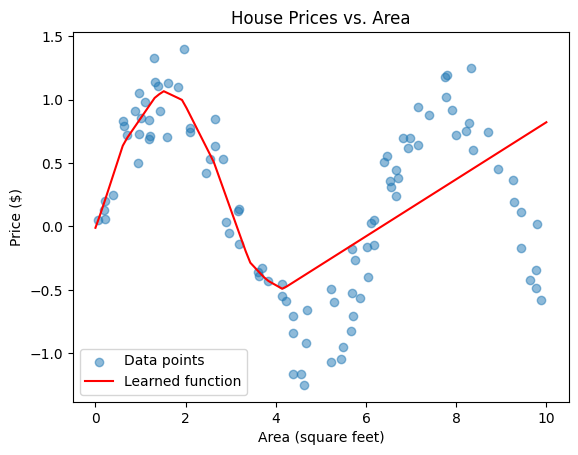

In [ ]:

model = NeuralNet(1,32,1)
print(X_train.shape) #(100,1)

train(model, X_train, y_train, lr=1e-2, batch_size=32, epochs=5000)

# evaluate(model, X_test, y_test)

visualize_learned_function(X_train, y_train, model)

# Reinforcement Learning - Policy Gradient

First you have to define an environment that your agents will interact with.

In [ ]:
from itertools import combinations
from torch import distributions


gamma = 0.9
a = 0.9 #probability that user picks a recommendation, given that he continues
q = 0.1 #probability that the user exits (terminates) the session

K = 30 #num of videos in platform (represents the states - indexed from 0 to K-1)
N = 1  #num of recommendations
u_min = 0.1 #relevance threshold


U = np.random.rand(K, K) #relevance matrix
np.fill_diagonal(U, 0)
U_bool = U > u_min #0 if j is irrelevant to i, 1 if j is relevant to i
U = U_bool


C = np.random.choice([0, 1], size=K, p=[0.8, 0.2])


actions = list(combinations(range(K), N))
num_of_actions = len(actions)


def is_cached(item):
    return 1 if C[item] == 1 else 0


def all_relevant(s, w):

    for item in w:
        if(not U_bool[s, item]): #if at least one of recommendations is not relevant return False
            return False
    return True



def get_next_state(state, action):
    distr = np.ones(K) #the probability of each next_state (transition)


    action = actions[action]
    if(not all_relevant(state, action)): #at least one irrelevant video
        distr *= (1/K) #user chooses next video randomly from search bar
        next_state = np.random.choice(K, p = distr) #sample next state from the correct distribution

    else: # all relevant
        distr *= ((1-a)/K) #every video has a probability of (1-a)/K to be chosen
        for item in action:
            distr[item] += a/N #but those that are recommended also have an extra probability of a/N

        next_state = np.random.choice(K, p = distr) #sample next state from the correct distribution
    return next_state



class RecEnv(): #like frozen lake

  def __init__(self):
    self.state = 0
    self.actions = actions

  # given action, return next state, reward and done
  def step(self, action):

    quit = np.random.binomial(1, q) #if quit == 1 then terminal state.

    if(quit == 1):
        return 0, 0, True

    self.state = get_next_state(self.state, action)

    reward = is_cached(self.state) #if next_state is cached -> reward = 1 else 0

    return self.state, reward, False

  def reset(self):
    self.state = np.random.randint(0,K)
    return self.state




In [ ]:
#1 trajectory
def sample_trajectory(env, policy):
    """Sample a rollout in the environment from a policy."""
    ob = env.reset() #state
    obs, acs, rewards, next_obs, terminals = [], [], [], [], []

    while True:


        # use the most recent ob and the policy to decide what to do
        ob = torch.tensor(U[ob, :]).float()

        ac_dist = policy.forward(ob)
        ac = ac_dist.sample().item()

        # use that action to take a step in the environment
        next_ob, rew, done = env.step(ac)


        rollout_done: bool = (done)

        # record result of taking that action
        obs.append(ob)
        acs.append(ac)
        rewards.append(rew)
        next_obs.append(next_ob)
        terminals.append(rollout_done)

        ob = next_ob  # jump to next timestep

        # end the rollout if the rollout ended
        if rollout_done:
            break

    return {
        "observation": np.array(obs, dtype=np.float32),
        "reward": np.array(rewards, dtype=np.float32),
        "action": np.array(acs, dtype=np.float32),
    }


def sample_n_trajectories(env, policy, ntraj):
    """Collect ntraj rollouts."""
    trajs = []
    for _ in range(ntraj):
        # collect rollout
        traj = sample_trajectory(env, policy)
        trajs.append(traj)
    return trajs #each trajectory is a dictionary

In [ ]:
class Policy(nn.Module):
  def __init__(self, state_dim, hidden_dim, action_dim):
      super(Policy, self).__init__()

      self.linear1 = nn.Linear(state_dim, hidden_dim)
      self.linear2 = nn.Linear(hidden_dim, hidden_dim)
      self.linear3 = nn.Linear(hidden_dim, action_dim)


  def forward(self, x):

      z1 = self.linear1(x)
      a1 = F.relu(z1)
      z2 = self.linear2(a1)
      a2 = F.relu(z2)
      logits = self.linear3(a2)
      dist = distributions.Categorical(logits=logits)
      return dist


class Critic(nn.Module):
  def __init__(self, state_dim, hidden_dim):
      super(Critic, self).__init__()

      self.linear1 = nn.Linear(state_dim, hidden_dim)
      self.linear2 = nn.Linear(hidden_dim, hidden_dim)
      self.linear3 = nn.Linear(hidden_dim, 1)


  def forward(self, x):

      z1 = self.linear1(x)
      a1 = F.relu(z1)
      z2 = self.linear2(a1)
      a2 = F.relu(z2)
      logits = self.linear3(a2)
      return logits





In [ ]:


def train(policy, env, lr, ntrajs, epochs, critic=None, normalize_advantages = False, baseline_update_steps=5):

  optimizer = torch.optim.SGD(policy.parameters(), lr=lr)

  for i in range(epochs):


    trajs = sample_n_trajectories(env, policy, ntrajs)

    # trajs should be a list of dictionaries of NumPy arrays, where each dictionary corresponds to a trajectory.
    # this line converts this into a single dictionary of lists of NumPy arrays.
    trajs_dict = {k: [traj[k] for traj in trajs] for k in trajs[0]}


    ep_rewards = trajs_dict["reward"] # ndarray[ [ndarrray rewards ep 1], [ndarray rewards ep2] ... ]
    rewards = np.concatenate(ep_rewards) # ndarray[ rewards for all episodes ]
    avg_ep_reward = np.sum(rewards)/ntrajs
    print(f'Epoch: {i} avg episode reward: {avg_ep_reward}')

    rtg = calculate_reward_to_go(ep_rewards) # ndarray[ [ndarrray rew to go ep 1], [ndarray rtg ep2] ... ]
    rtg = np.concatenate(rtg) # ndarray[ rtg for each timestep for all episodes ]

    obs = np.vstack(trajs_dict["observation"])
    actions = np.concatenate(trajs_dict["action"])

    # advantage(t) can be the reward to go (rtg(t)) or rtg(t)-b(t) where b is any baseline
    # for example if b is the average reward then if rtg(t)-b(t) > 0 it means that the action at timestep t
    # got more reward than what we get on average so its a good action and the improved policy will favor it compared
    # to other actions that perform worse than average i.e. rtg(t)-b(t) < 0
    # In this code the baseline I use is the value function (fitted with another neural net) - typical actor-critic setting
    # but first try something simpler like the average reward.
    advantage = _estimate_advantage(obs, rtg, critic=critic, normalize_advantages = normalize_advantages)

    # transfrom everything to a tensor because that's what we have to work with in pytorch
    rtg = torch.tensor(rtg).float()
    obs = torch.tensor(obs).float()
    actions = torch.tensor(actions).float()
    advantage = torch.tensor(advantage).float()



    dist = policy(obs) #another forward pass
    log_probs = dist.log_prob(actions) # this is very useful. Search google for Pytorch Categorical. Helps you work with probabilities

    loss = -(log_probs * advantage).sum() #this is a custom loss function created in a way such that when we take the gradient we will get the policy gradient that we want

    #standard gradient descent update steps. Don't forget the zero_grad!
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # update the neural net that gives us estimates of the value of a state.
    # If you use average reward as a baseline you won't need this one here.
    update_critic(critic, obs, rtg, lr=lr, baseline_update_steps=baseline_update_steps)



def calculate_reward_to_go(rewards):
  rtg = []
  for ep_rewards in rewards:
      discounted_reward_to_go = _discounted_reward_to_go(ep_rewards.tolist())
      rtg.append(np.array(discounted_reward_to_go))
  return rtg

def _discounted_reward_to_go(rewards):
    """
    Helper function which takes a list of rewards {r_0, r_1, ..., r_t', ... r_T} and returns a list where the entry
    in each index t' is sum_{t'=t}^T gamma^(t'-t) * r_{t'}.
    """

    T = len(rewards)

    discounts = [gamma**t for t in range(T)]
    discounted_reward_to_go = []

    for t in range(T):
        temp = []
        for a, b in zip(rewards[t:], discounts[:T-t]):
            temp.append(a*b)

        discounted_reward_to_go.append(sum(temp))

    return discounted_reward_to_go


def _estimate_advantage(
    obs,
    rtg,
    critic = None,
    normalize_advantages = None
):
    """Computes advantages by (possibly) subtracting a value baseline from the estimated Q-values.

    Operates on flat 1D NumPy arrays.
    """
    if critic is None:
        # if no baseline, then what are the advantages? advantage = rtg - b = rtg
        advantages = rtg
    else:
        #run the critic and use it as a baseline
        obs = torch.tensor(obs).float()
        values = critic(obs).squeeze()
        values = values.detach().numpy()
        assert values.shape == rtg.shape


        advantages = rtg - values


    # normalize the advantages to have a mean of zero and a standard deviation of one within the batch
    if normalize_advantages:
        advantages = (advantages - np.mean(advantages)) / \
            np.std(advantages)

    return advantages

def update_critic(critic, obs, rtg, lr=1e-1, baseline_update_steps=5):
    optimizer = torch.optim.SGD(critic.parameters(), lr=lr)
    # obs = ptu.from_numpy(obs)
    # q_values = ptu.from_numpy(q_values)
    rtg = rtg.unsqueeze(1)
    # update the critic using the observations and q_values
    for i in range(baseline_update_steps):
      optimizer.zero_grad()
      values = critic(obs)
      loss_fn = nn.MSELoss()

      loss = loss_fn(values, rtg)

      loss.backward()
      optimizer.step()

    # print(f'Baseline loss: {loss}')

In [ ]:
env = RecEnv()
policy = Policy(K, 64, num_of_actions) #neural net
critic = Critic(K, 64)
train(policy, env, lr=1e-3, ntrajs=512, epochs=40, critic=critic, normalize_advantages=True, baseline_update_steps=5)

Epoch: 0 avg episode reward: 1.537109375
Epoch: 1 avg episode reward: 1.7890625
Epoch: 2 avg episode reward: 3.185546875
Epoch: 3 avg episode reward: 6.740234375
Epoch: 4 avg episode reward: 5.115234375
Epoch: 5 avg episode reward: 5.177734375
Epoch: 6 avg episode reward: 5.01171875
Epoch: 7 avg episode reward: 4.423828125
Epoch: 8 avg episode reward: 4.58984375
Epoch: 9 avg episode reward: 4.9765625
Epoch: 10 avg episode reward: 5.064453125
Epoch: 11 avg episode reward: 4.4375
Epoch: 12 avg episode reward: 4.7109375
Epoch: 13 avg episode reward: 4.91015625
Epoch: 14 avg episode reward: 4.75390625
Epoch: 15 avg episode reward: 5.095703125
Epoch: 16 avg episode reward: 4.943359375
Epoch: 17 avg episode reward: 5.169921875
Epoch: 18 avg episode reward: 5.095703125
Epoch: 19 avg episode reward: 4.47265625
Epoch: 20 avg episode reward: 4.6875
Epoch: 21 avg episode reward: 4.439453125
Epoch: 22 avg episode reward: 5.431640625
Epoch: 23 avg episode reward: 5.07421875
Epoch: 24 avg episode re

# Steps:

1. Create environment
2. Create your neural nets
3. Interact with the env and gather information
4. Improve your neural nets


Recommended: Pieter Abeel lecture on youtube for Policy Gradients:
https://www.youtube.com/watch?v=AKbX1Zvo7r8&t=1436s

But first feel confident to create a neural net and understand some of the ML vocabulary.

Contact: kmylonas@tuc.gr